In [30]:
# Imported Libraries 
import pandas as pd 
import urllib
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# ----- make nice figures -----
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150
from cycler import cycler
COLORS = ['#F00D2C', '#242482', '#0071BE', '#4E8F00', '#553C67', '#DA5319', '#242482']
default_cycler = cycler(color= 'r''b')
plt.rc('axes', prop_cycle=default_cycler) 
# -----------------------------

In [31]:
# HTTP request for data 1

df = pd.read_csv('flake2-1_50x_514nm_10p_10s5x.csv')
y = np.array(df)
print(df)

          Wave    Intensity
0     1.699640   764.954590
1     1.699705   798.421387
2     1.699770   659.659058
3     1.699834   874.613770
4     1.699899   616.424255
...        ...          ...
4978  2.199091  2475.435303
4979  2.199239  2481.336670
4980  2.199385  2476.696777
4981  2.199533  2480.488281
4982  2.199680  2515.885010

[4983 rows x 2 columns]


In [32]:
WN = y[:,0]
I = y[:,1]/ 1e2

#print(WN)
#print(I)

print(np.max(WN))
print(np.min(WN))

2.19968
1.69964


Text(0.5, 1.0, 'MoS2')

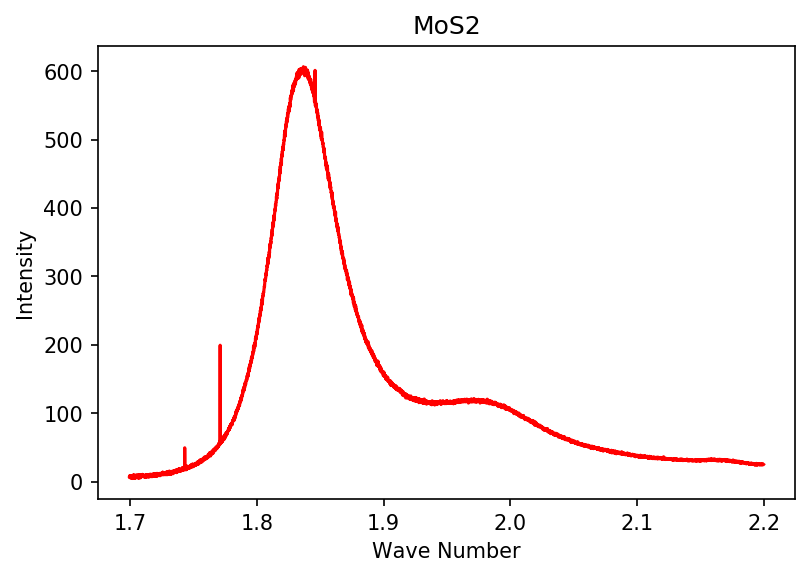

In [33]:

plt.plot(WN,I)
plt.xlabel('Wave Number')
plt.ylabel('Intensity')
plt.title('MoS2')

In [34]:
#import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor

#Wave_Numb = [WN]
#Intensity = [I] 

x_data = WN
y_data = I

print (x_data)

#Sigma_n = Covariance matrix
sigma_0 = 75   #Initial uncertainty 
sigma_W = 5 #Initial noise variance 
length_scale = 50 #Initial length scale guess
f_0 = 0 # inital mean

# squared exponential kernel
kernel = sigma_0**2*RBF(length_scale, length_scale_bounds = (-100,1e4))

# normalized y confirms mean is = zero

model = GaussianProcessRegressor(kernel = kernel, alpha = sigma_W, normalize_y = True)

# x - sigma values that will be calculated
x_test = np.linspace(1.6, 2.2, 50)

model.fit(x_data[:, np.newaxis], y_data,)

y_test, err = model.predict(x_test[:, np.newaxis], return_std = True)


#plt.scatter(x_test, y_test, label = 'New Data')
plt.scatter(x_data,y_data, label='Data')
plt.fill_between(x_test, y_test +err, y_test - err, alpha = .9)
plt.xlabel('PL Energy eV')
plt.ylabel('Intensity')
plt.title('Gaussian Process Raw Data Fit')
plt.legend()
plt.show

[1.69964  1.699705 1.69977  ... 2.199385 2.199533 2.19968 ]


/Users/PopeRay22/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:301: RuntimeWarning: invalid value encountered in log
  return np.log(np.vstack(bounds))


ValueError: array must not contain infs or NaNs

In [27]:
print(y_test)
print(x_test)

[214.97896279 212.05201785 209.12168299 206.18796244 203.25085666
 200.31036422 197.36648525 194.41922109 191.46857545 188.5145441
 185.55713089 182.59633378 179.63215472 176.66459204 173.69365248
 170.71933027 167.74162605 164.76054409 161.77608369 158.788243
 155.79702488 152.80243102 149.8044591  146.80311202 143.79838682
 140.79028904 137.77881323 134.76396732 131.74574354 128.72414919
 125.69918179 122.67084219 119.63913182 116.60405102 113.56559801
 110.52377508 107.47858229 104.43002331 101.37809645  98.3228026
  95.26413661  92.20210979  89.13671289  86.06795545  82.995829
  79.92033932  76.84148505  73.75927004  70.67369286  67.58475286]
[1.6        1.6122449  1.6244898  1.63673469 1.64897959 1.66122449
 1.67346939 1.68571429 1.69795918 1.71020408 1.72244898 1.73469388
 1.74693878 1.75918367 1.77142857 1.78367347 1.79591837 1.80816327
 1.82040816 1.83265306 1.84489796 1.85714286 1.86938776 1.88163265
 1.89387755 1.90612245 1.91836735 1.93061224 1.94285714 1.95510204
 1.9673469

<function matplotlib.pyplot.show(*args, **kw)>

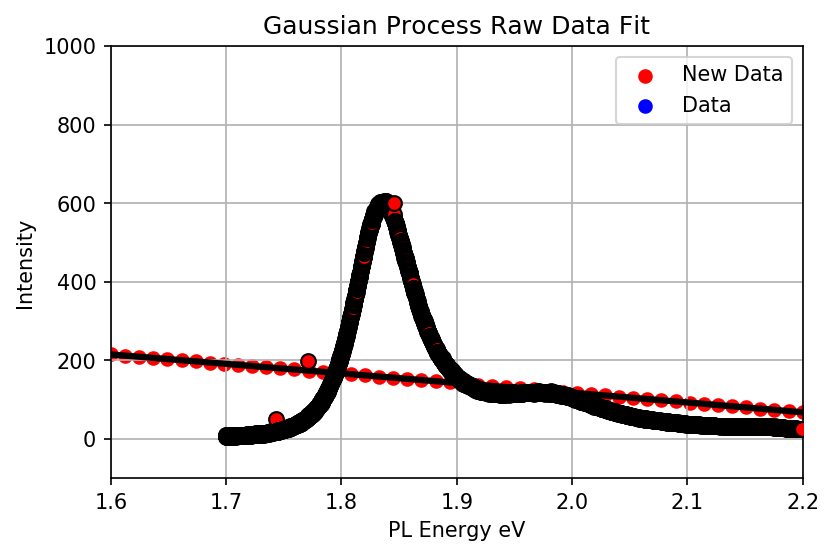

In [28]:
from sklearn.gaussian_process.kernels import RBF
kernels = [75**2* RBF(length_scale=50, length_scale_bounds=(50, 1e4))]
for kernel in kernels:
    
    model = GaussianProcessRegressor(kernel = kernel, alpha = sigma_W, normalize_y = True)
        
    # Plot posterior
    X = x_data
    y = y_data
    
    
    x_test = np.linspace(1.6, 2.2, 50)
    plt.grid()
    model.fit(X[:, np.newaxis], y)
    
    #sampling from prior
    y_samples = model.sample_y(x_test[:, np.newaxis], 10)
    
    y_mean, y_std = model.predict(x_test[:, np.newaxis], return_std=True)
    
    plt.plot(x_test, y_samples, lw=1)
    plt.scatter(X, y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
    plt.plot(x_test, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(x_test, y_mean - y_std, y_mean + y_std,
                     alpha=.9, color='k')

    plt.xlim(1.6, 2.2)
    plt.ylim(-100,1000)
    plt.xlabel('Temperature (C)')
    plt.ylabel('Carbon Concentration [C] $cm^3$')
    plt.title("Posterior beliefs (kernel: %s, noise: %s)\n Log-Likelihood: %.3f"
              % (kernel, model.alpha, model.log_marginal_likelihood(model.kernel_.theta)),
              fontsize=12)
    plt.tight_layout()

#plt.show()
#y_std = ((y_std)**2)
#print(np.max(y_std))






plt.scatter(x_test, y_test, label = 'New Data')
plt.scatter(x_data,y_data, label='Data')
plt.fill_between(x_test, y_test +err, y_test - err, alpha = .9)
plt.xlabel('PL Energy eV')
plt.ylabel('Intensity')
plt.title('Gaussian Process Raw Data Fit')
plt.legend()
plt.show

In [5]:
# HTTP request for data 1

df = pd.read_csv('flake2-3_50x_514nm_10p_10s5x.csv')
x = np.array(df)
print(df)

          Wave    Intensity
0     1.699640   478.096619
1     1.699705   583.277893
2     1.699770   549.715881
3     1.699834   497.048248
4     1.699899   707.215393
...        ...          ...
4978  2.199091  2129.633301
4979  2.199239  2144.026611
4980  2.199385  2046.700073
4981  2.199533  2046.350098
4982  2.199680  2102.892090

[4983 rows x 2 columns]


In [6]:
WN1 = x[:,0]
I1 = x[:,1]

print(WN)

[1.69964  1.699705 1.69977  ... 2.199385 2.199533 2.19968 ]


Text(0.5, 1.0, 'MoS2')

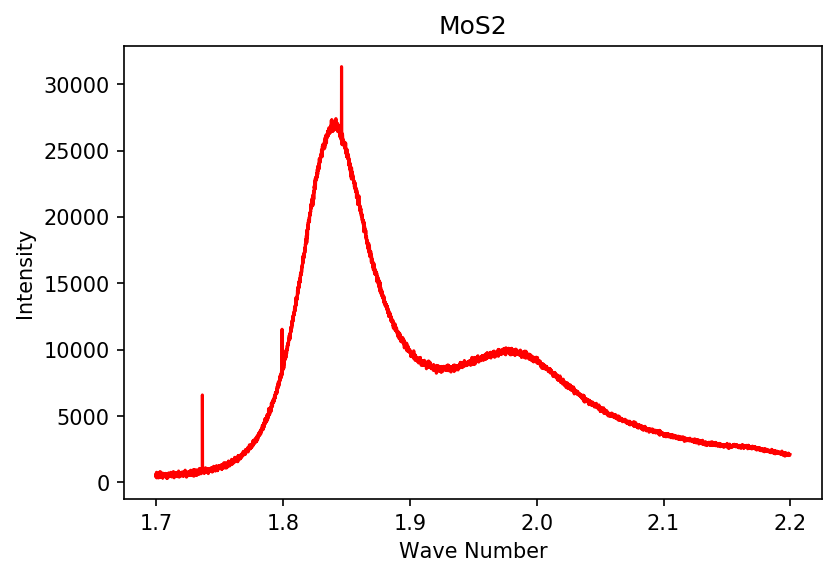

In [7]:
plt.plot(WN1,I1)
plt.xlabel('Wave Number')
plt.ylabel('Intensity')
plt.title('MoS2')

In [8]:
# HTTP request for data 1

df = pd.read_csv('flake2-4_50x_514nm_10p_10s5x.csv')
z = np.array(df)
print(df)

          Wave    Intensity
0     1.699640   401.601166
1     1.699705   807.983276
2     1.699770   482.793945
3     1.699834   583.075867
4     1.699899   492.183685
...        ...          ...
4978  2.199091  2022.097412
4979  2.199239  1947.965210
4980  2.199385  2023.513916
4981  2.199533  2033.705322
4982  2.199680  2046.000244

[4983 rows x 2 columns]


In [9]:
WN2 = x[:,0]
I2 = x[:,1]

print(WN2)

[1.69964  1.699705 1.69977  ... 2.199385 2.199533 2.19968 ]


Text(0.5, 1.0, 'MoS2')

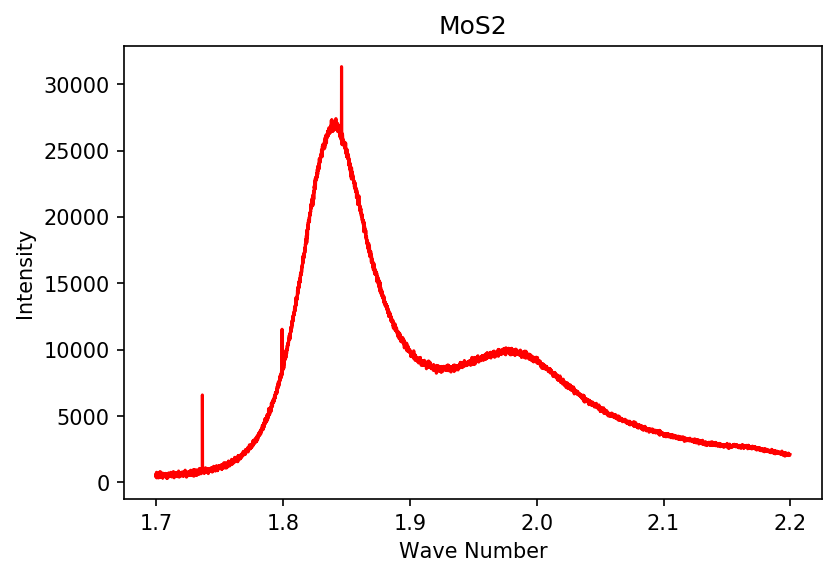

In [10]:
plt.plot(WN2,I2)
plt.xlabel('Wave Number')
plt.ylabel('Intensity')
plt.title('MoS2')

In [19]:
import matplotlib.pyplot as plt

In [61]:
#import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor

Wave_Numb = np.array([WN])
Intensity = np.array([I]) 

x_data = T
y_data = CC

#Sigma_n = Covariance matrix
sigma_0 = .5   #Initial uncertainty 
sigma_W = .05 #Initial noise variance 
length_scale = 50 #Initial length scale guess
f_0 = 0 # inital mean

# squared exponential kernel
kernel = sigma_0**2*RBF(length_scale, length_scale_bounds = (50,1e4))

# normalized y confirms mean is = zero

model = GaussianProcessRegressor(kernel = kernel, alpha = sigma_W, normalize_y = True)

# x - sigma values that will be calculated
x_test = np.linspace(1, 3, 4000)

model.fit(x_data, y_data,)

y_test, err = model.predict(x_test[:, np.newaxis]#, return_std = True)

print(np.max(y_data))

plt.scatter(x_test, y_test, label = 'New Data')
plt.scatter(x_data,y_data, label='Data')
plt.fill_between(x_test, y_test +err, y_test - err, alpha = .3)
plt.xlabel('Wave Number')
plt.ylabel('Intensity')
plt.title('Gaussian Process Raw Data Fit')
plt.legend()
plt.show()  

SyntaxError: invalid syntax (<ipython-input-61-bc7d45e2e644>, line 31)